In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re # it's not real programming if you don't use regex
import math

# Load Data

In [2]:
vehicles_data = pd.read_csv("vehicles_data.csv", encoding = "ISO-8859-1")

/tmp/ipykernel_41628/273396500.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicles_data = pd.read_csv("vehicles_data.csv", encoding = "ISO-8859-1")


In [3]:
vehicles_data

,Date Of Stop,Time Of Stop,Description,Location,VehicleType,Year,Make,Model,Color,Violation Type,Race,Gender,Price
0,9/30/14,23:51:00,DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED ...,PARK RD AT HUNGERFORD DR,02 - Automobile,2014.0,FORD,MUSTANG,BLACK,Citation,BLACK,M,7949.0
1,3/31/15,23:59:00,HEADLIGHTS (*),CONNECTICUT AT METROPOLITAN AVE,02 - Automobile,2003.0,HONDA,2S,BLUE,ESERO,HISPANIC,M,3022.0
2,9/30/14,23:30:00,FAILURE TO DISPLAY TWO LIGHTED FRONT LAMPS WHE...,OBSERVATION @ RIDGE ROAD,02 - Automobile,2009.0,TOYOTA,CAMRY,RED,Warning,BLACK,F,4939.0
3,3/31/15,23:59:00,DRIVER FAILURE TO STOP AT STOP SIGN LINE,W/B PLYERS MILL RD AT METROPOLITAN AVE,02 - Automobile,2007.0,ACURA,MDX,BLACK,Warning,WHITE,F,4105.0
4,3/31/15,23:58:00,STOP LIGHTS (*),2355 NB AT BATTERY LN,02 - Automobile,2003.0,NISSAN,MURANO,SILVER,ESERO,OTHER,M,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
803884,9/29/14,14:11:00,TIRES,GREAT SENECA HWY @ GREAT SENECA CREEK,02 - Automobile,1996.0,LEXUS,ES 300 4S,WHITE,ESERO,BLACK,M,500.0
803885,9/29/14,21:23:00,HEADLIGHTS (*),"7505 DEMOCRACY BLV ,MCG",02 - Automobile,2011.0,KIA,VN,RED,ESERO,BLACK,M,7217.0
803886,9/29/14,21:37:00,HEADLIGHTS (*),7300 TUCKERMAN LA AT 10998 WESTLAKE DR,02 - Automobile,2012.0,FIAT,2S,RED,ESERO,WHITE,F,7128.0
803887,9/28/14,23:33:00,HEADLIGHTS (*),DARNESTOWN RD @ QUINCE ORCHARD RD,02 - Automobile,1992.0,JEEP,TK,SILVER,ESERO,WHITE,M,500.0


In [4]:
vehicles_data.dtypes

Date Of Stop       object
Time Of Stop       object
Description        object
Location           object
VehicleType        object
Year               object
Make               object
Model              object
Color              object
Violation Type     object
Race               object
Gender             object
Price             float64
dtype: object

**Attributes Definition:**
* **Date of Stop (date):** Date of traffic violation
* **Time of Stop:** Time of traffic violation
* **Description (char):** the reason of traffic violation, record by officer
* **Location (char):** traffic location, including street number
* **Vehicle type (char):** type of violation vehicle, distinguish automobile, truck or other type vehicle
* **Year (float):** Production year of violation vehicle, record on vehicle title file
* **Make (char):** Make of violation vehicle, the make company on vehicle title file
* **Model (char):** Model of violation vehicle
* **Color (char):** Color of violation vehicle
* **Violation type (char):** the violation type defined by officer
* **Race (char):** Race of driver
* **Gender (char):** Gender of driver
* **Prices (float):** Estimated price of vehicle

# Overview
You have been tasked by a company to analyze and process data related to vehicles from
previous years. Your role involves extracting key statistical insights from the dataset and
visualizing the data to uncover patterns and trends. This project will test your ability to work
with real-world data, apply statistical methods, and create informative visualizations.

# Objectives
* Extract and calculate important statistical measures from the vehicle dataset.
* Identify and handle missing and void values in the data.
* Create visual representations of the data to highlight key findings.

# Data Cleaning


In [5]:
# count rows before removal
oldRows = len(vehicles_data.index)

# remove bad dates
def regex_filter(val, regex):
    if val:
        mo = re.search(regex, val)
        if mo:
            return True
        else:
            return False
    else:
        return False
    

vehicles_data = vehicles_data[vehicles_data["Date Of Stop"].apply(regex_filter,regex=r"\d+/\d+/\d+")]
# convert floats

# convert price and year to numbers
vehicles_data[["Price", "Year"]] = vehicles_data[["Price", "Year"]].astype(float)
# remove any rows with invalid price or year
vehicles_data = vehicles_data.dropna()
vehicles_data[["Year"]] = vehicles_data[["Year"]].astype(int)

# remove invalid vehicle years
def year_filter(val):
    # the first car was made in 1886, and 2026 has not happened yet
    if(val >= 1886 and val <= 2025):
        return True
    else:
        return False

vehicles_data = vehicles_data[vehicles_data["Year"].apply(year_filter)]

# convert date and time to datetime
vehicles_data["Datetime of Stop"] = pd.to_datetime(vehicles_data["Date Of Stop"] + "_" + vehicles_data["Time Of Stop"], format='%m/%d/%y_%H:%M:%S')
vehicles_data = vehicles_data.drop(["Date Of Stop", "Time Of Stop"], axis=1)

newRows = len(vehicles_data.index)
rowsDropped = oldRows - newRows

vehicles_data

/tmp/ipykernel_41628/51839834.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles_data[["Price", "Year"]] = vehicles_data[["Price", "Year"]].astype(float)


,Description,Location,VehicleType,Year,Make,Model,Color,Violation Type,Race,Gender,Price,Datetime of Stop
0,DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED ...,PARK RD AT HUNGERFORD DR,02 - Automobile,2014,FORD,MUSTANG,BLACK,Citation,BLACK,M,7949.0,2014-09-30 23:51:00
1,HEADLIGHTS (*),CONNECTICUT AT METROPOLITAN AVE,02 - Automobile,2003,HONDA,2S,BLUE,ESERO,HISPANIC,M,3022.0,2015-03-31 23:59:00
2,FAILURE TO DISPLAY TWO LIGHTED FRONT LAMPS WHE...,OBSERVATION @ RIDGE ROAD,02 - Automobile,2009,TOYOTA,CAMRY,RED,Warning,BLACK,F,4939.0,2014-09-30 23:30:00
3,DRIVER FAILURE TO STOP AT STOP SIGN LINE,W/B PLYERS MILL RD AT METROPOLITAN AVE,02 - Automobile,2007,ACURA,MDX,BLACK,Warning,WHITE,F,4105.0,2015-03-31 23:59:00
4,STOP LIGHTS (*),2355 NB AT BATTERY LN,02 - Automobile,2003,NISSAN,MURANO,SILVER,ESERO,OTHER,M,3000.0,2015-03-31 23:58:00
...,...,...,...,...,...,...,...,...,...,...,...,...
803884,TIRES,GREAT SENECA HWY @ GREAT SENECA CREEK,02 - Automobile,1996,LEXUS,ES 300 4S,WHITE,ESERO,BLACK,M,500.0,2014-09-29 14:11:00
803885,HEADLIGHTS (*),"7505 DEMOCRACY BLV ,MCG",02 - Automobile,2011,KIA,VN,RED,ESERO,BLACK,M,7217.0,2014-09-29 21:23:00
803886,HEADLIGHTS (*),7300 TUCKERMAN LA AT 10998 WESTLAKE DR,02 - Automobile,2012,FIAT,2S,RED,ESERO,WHITE,F,7128.0,2014-09-29 21:37:00
803887,HEADLIGHTS (*),DARNESTOWN RD @ QUINCE ORCHARD RD,02 - Automobile,1992,JEEP,TK,SILVER,ESERO,WHITE,M,500.0,2014-09-28 23:33:00


In [6]:
print(rowsDropped)

12817


vehicles_data.dtypes

# Data Analysis
## Determine the 6-th newest year of vehicle (maximum year & price).

This is a really weird thing to ask for. The maximum price of cars in the sixth-newest year? Is that important information?

In [7]:
# let's get all the years
years = vehicles_data["Year"].value_counts().index.to_list()
years.sort()
years

[1886,
 1887,
 1894,
 1900,
 1902,
 1920,
 1925,
 1930,
 1931,
 1932,
 1936,
 1951,
 1952,
 1953,
 1957,
 1958,
 1959,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025]

HOLY GUACOMOLE! You're telling me we got an 1886 car in the records??

In [8]:
vehicles_data.query("Year == 1886")

,Description,Location,VehicleType,Year,Make,Model,Color,Violation Type,Race,Gender,Price,Datetime of Stop
739122,DRIVER FAILURE TO STOP AT STOP SIGN LINE,BLUERIDGE AVE @ DAWSON AVE,02 - Automobile,1886,FORD,RANGER,"GREEN, DK",Warning,HISPANIC,M,500.0,2014-01-18 10:21:00


THE FORD RANGER DIDN'T COME OUT IN 1886! RIDICULOUS! But I don't wanna get the data needed to filter out that type of nonsense, so I guess I'm just leaving that.

We just gotta find the max price per year now.

In [9]:
year_prices = vehicles_data[["Year", "Price"]].drop_duplicates()
year_prices

,Year,Price
0,2014,7949.0
1,2003,3022.0
2,2009,4939.0
3,2007,4105.0
4,2003,3000.0
...,...,...
796868,2004,4424.0
800265,2007,6601.0
800392,2015,8301.0
802063,2012,8623.0


In [10]:
year_max_prices = year_prices[year_prices["Price"]==year_prices.groupby("Year")["Price"].transform("max")]
year_max_prices = year_max_prices.sort_values(by="Year", ascending=False)
year_max_prices.set_index("Year", inplace=True)
year_max_prices

,Price
Year,
2025,12330.0
2024,11946.0
2023,11549.0
2022,12112.0
2021,12202.0
...,...
1902,500.0
1900,500.0
1894,500.0


Let's do min prices too.

In [11]:
year_min_prices = year_prices[year_prices["Price"]==year_prices.groupby("Year")["Price"].transform("min")]
year_min_prices = year_min_prices.sort_values(by="Year", ascending=False)
year_min_prices.set_index("Year", inplace=True)
year_min_prices

,Price
Year,
2025,12330.0
2024,10909.0
2023,10549.0
2022,9612.0
2021,9705.0
...,...
1902,500.0
1900,500.0
1894,500.0


What were we trying to do again? Oh yeah, "**Determine the 6-th newest year of vehicle (maximum year & price).**"

In [12]:
sixthnewestyear = year_max_prices.index[5]
sixthnewestprice = year_max_prices["Price"][sixthnewestyear]

print( "6th newest year: %d and maximum price: %f" % (sixthnewestyear, sixthnewestprice) )

6th newest year: 2020 and maximum price: 9322.000000


## Find the 4-th oldest year of vehicle (minimum year & price).

In [13]:
year_min_prices.tail(4)

,Price
Year,
1900,500.0
1894,500.0
1887,500.0
1886,500.0


In [14]:
fourtholdestyear = year_min_prices.index[len(year_min_prices) - 4]
fourtholdestprice = year_min_prices["Price"][fourtholdestyear]

print( "4th oldest year: %d and minimum price: %f" % (fourtholdestyear, fourtholdestprice) )

4th oldest year: 1900 and minimum price: 500.000000


## Identify and count the number of missing values.

In [15]:
print( "Missing rows: %d" % (rowsDropped))

Missing rows: 12817


## Convert all of your findings into a data frame table and print it in your .ipynb file.

In [16]:
sillydata = pd.DataFrame([
    {"index" : "6th newest year", "value" : sixthnewestyear},
    {"index" : "6th newest year maximum price", "value" : sixthnewestprice},
    {"index" : "4th oldest year", "value" : fourtholdestyear},
    {"index" : "4th oldest year minimum price", "value" : fourtholdestprice},
    {"index" : "Missing rows", "value" : rowsDropped}
]).set_index("index")

sillydata

,value
index,
6th newest year,2020.0
6th newest year maximum price,9322.0
4th oldest year,1900.0
4th oldest year minimum price,500.0
Missing rows,12817.0


## Save your data frame table to csv file.

In [17]:
sillydata.to_csv("silly.csv")

# Data Visualization

* Create at least five unique graphs for statistic results.
* Unique graphs require different graph types and different data sections.
* Please use the fontsize parameter to adjust the title, x-axis, and y-axis labels.
* Also, add a grid to your graphs for better readability.
* You should use Markdown to introduce your visualization results including: the purpose of your exploration, the content of your graph, and your conclusions.
* Save each visualization and upload them to GitHub.

## Violations by gender

In [18]:
genders = vehicles_data["Gender"].value_counts()
genders

Gender
M    527914
F    262408
U       750
Name: count, dtype: int64

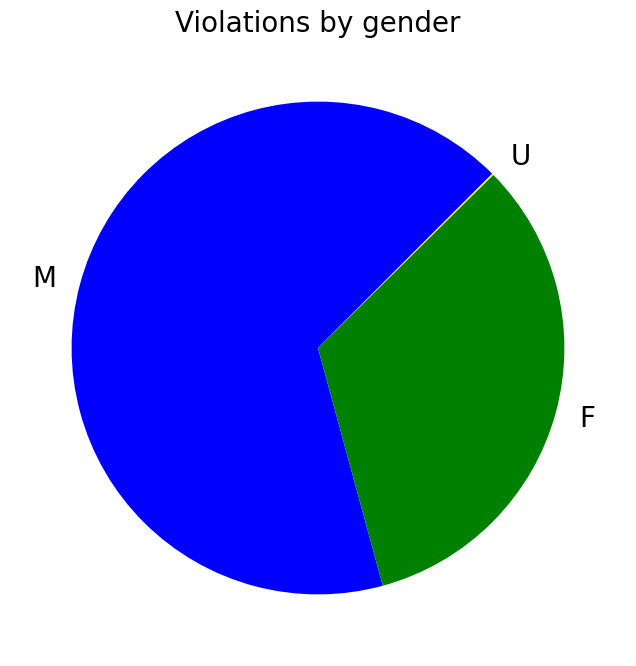

In [19]:
# Creating a pie chart

plt.figure(figsize = (8,8))
plt.pie(genders, labels=genders.index,
        colors=["blue", "green", "yellow"], startangle=45, textprops={'fontsize': 20});

plt.title("Violations by gender", fontsize =20)
plt.show()

## Violations by year

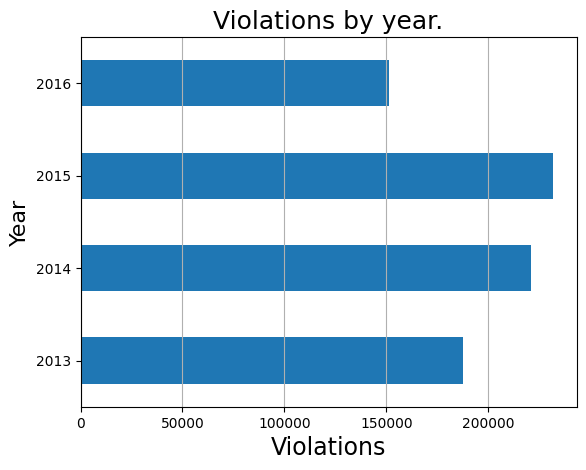

In [20]:
vehicles_data["Datetime of Stop"].groupby([vehicles_data["Datetime of Stop"].dt.year]).count().plot(kind="barh")
plt.title("Violations by year.",fontsize=18)
plt.xlabel("Violations",fontsize=17)
plt.ylabel("Year",fontsize=16)
plt.grid(axis='x')
plt.show()

## Price vs year of car

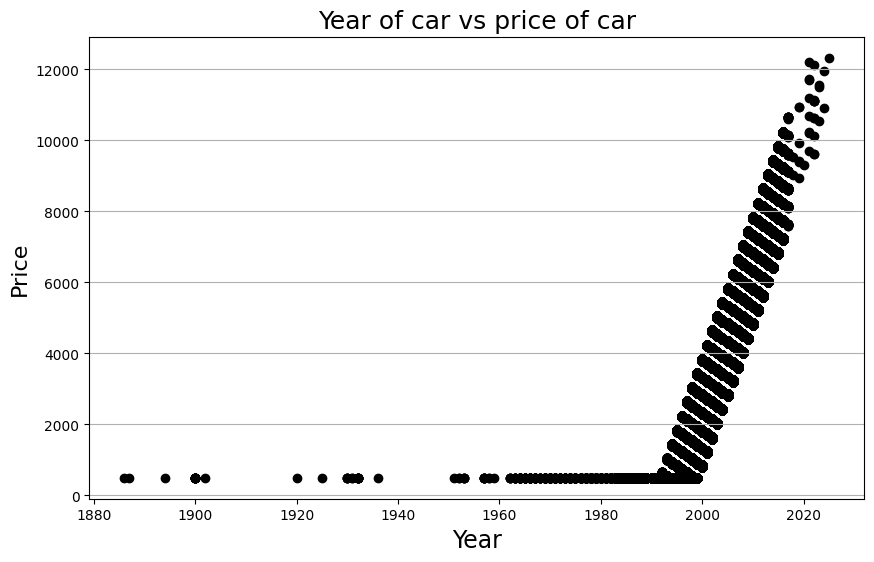

In [21]:
# Creating a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(vehicles_data["Year"].tolist(),vehicles_data["Price"].tolist(),color='black')


plt.title("Year of car vs price of car",fontsize=18)
plt.xlabel("Year",fontsize=17)
plt.ylabel("Price",fontsize=16)
plt.grid(axis='y')

plt.show()

## Color of car vs price year of car

This is probably the most important information we can gather from this data.

In [22]:
colors = vehicles_data["Color"].value_counts().index
color_price_df = vehicles_data[["Color", "Price"]]
colors

Index(['BLACK', 'SILVER', 'WHITE', 'GRAY', 'RED', 'BLUE', 'GREEN', 'GOLD',
       'TAN', 'BLUE, DARK', 'MAROON', 'BLUE, LIGHT', 'BEIGE', 'GREEN, DK',
       'GREEN, LGT', 'BROWN', 'YELLOW', 'ORANGE', 'BRONZE', 'PURPLE',
       'MULTICOLOR', 'CREAM', 'COPPER', 'PINK', 'CHROME', 'CAMOUFLAGE'],
      dtype='object', name='Color')

In [23]:
color_prices = {}
for r in color_price_df.itertuples(index=False):
    color = r.Color
    price = r.Price
    if(color in color_prices):
        color_prices[color].append(price)
    else:
        color_prices[color] = [price]

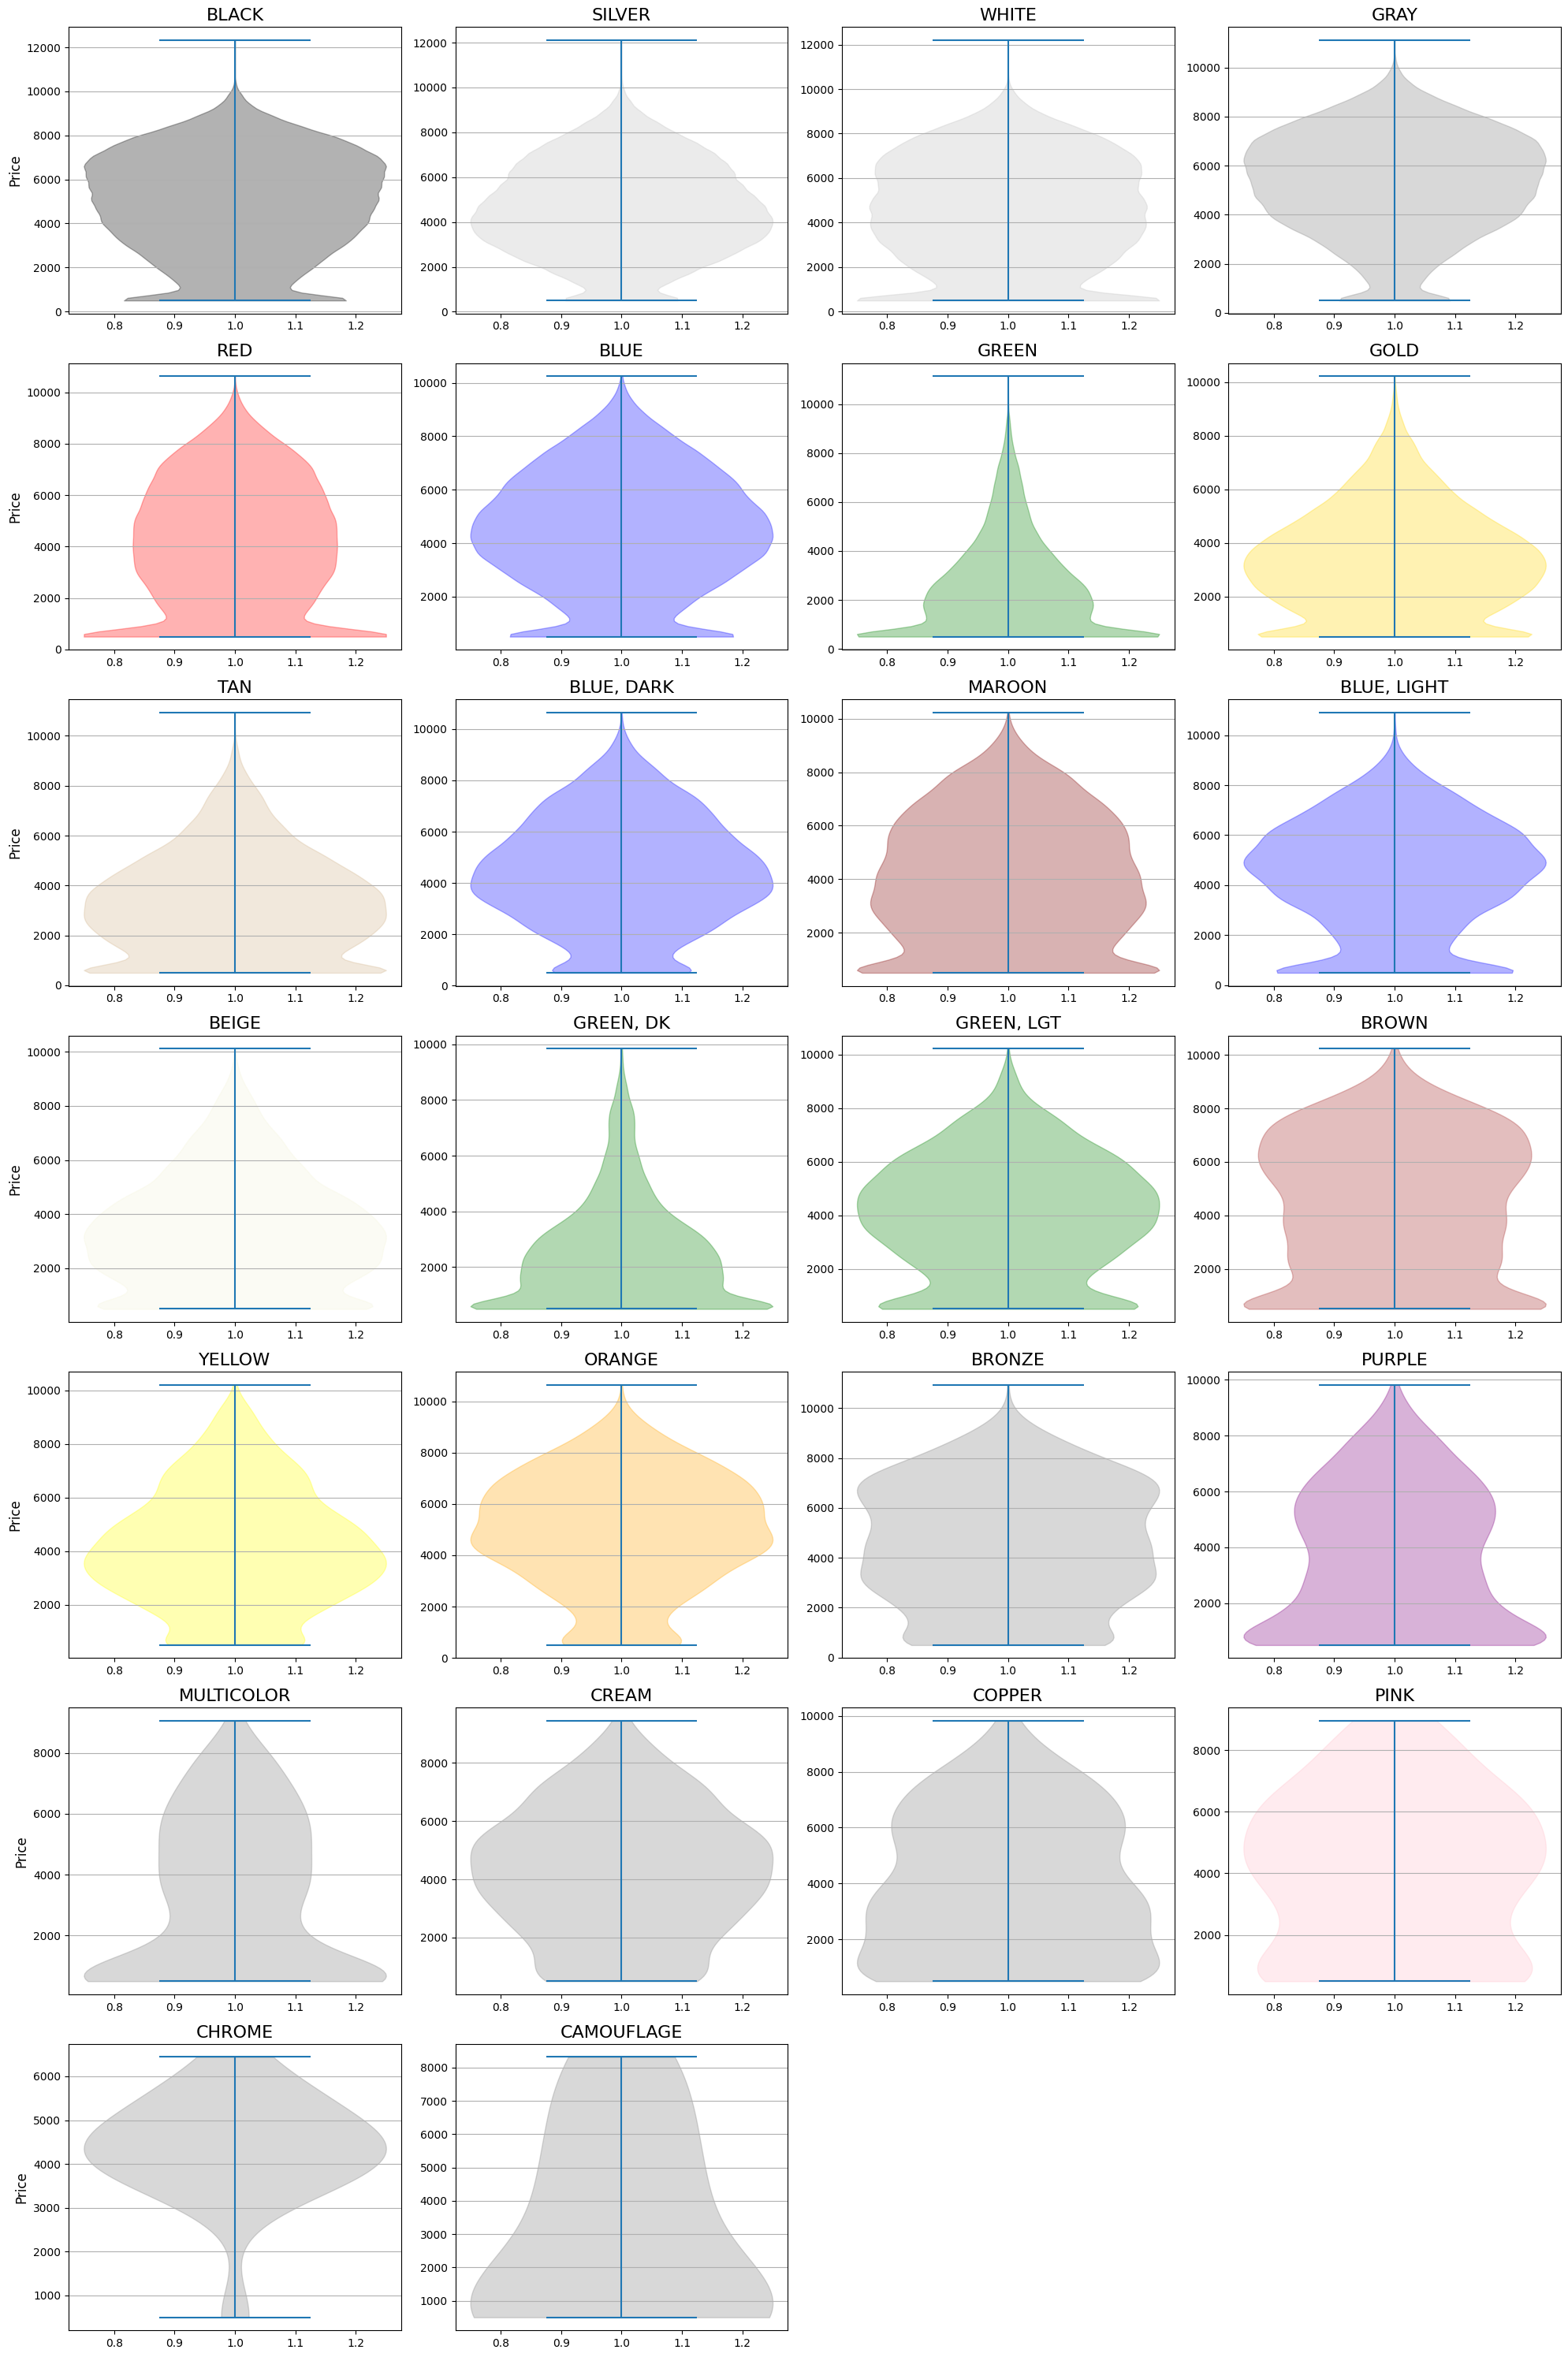

In [24]:
cols = 4
rows = math.ceil(len(colors)/cols)
fig, axes = plt.subplots(rows, cols, figsize=(20, 30))

for i in range(len(colors)):
    color = colors[i]
    c = i % cols
    r = math.floor(i/cols)
    axes[r, c].set_title(color, fontsize="16")
    
    vp = axes[r, c].violinplot(color_prices[color])

    drawcolor = color
    if("," in drawcolor):
        drawcolor = drawcolor.split(",")[0]
    if(drawcolor == "WHITE"):
        drawcolor = "SILVER"
    # Change face and edge color for each violin
    for i, body in enumerate(vp["bodies"]):
        try:
            body.set_facecolor(drawcolor)
            body.set_edgecolor(drawcolor)
        except:
            body.set_facecolor("GRAY")
            body.set_edgecolor("GRAY")

    if c == 0:
        axes[r, c].set_ylabel("Price", fontsize=12)

    axes[r, c].grid(axis='y')

fig.delaxes(axes[rows-1, cols-1])
fig.delaxes(axes[rows-1, cols-2])

fig.tight_layout()
plt.show()

## Violation types

In [25]:
vtypes = vehicles_data["Violation Type"].value_counts()
vtypes

Violation Type
Citation    376125
Warning     368565
ESERO        46356
SERO            26
Name: count, dtype: int64

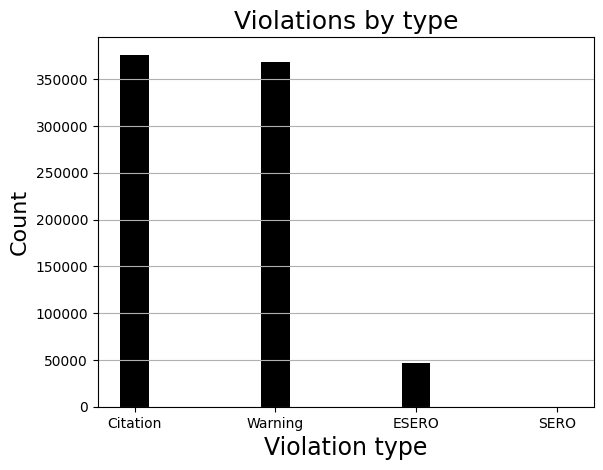

In [26]:
plt.bar(vtypes.index, vtypes, width=0.2, color="#000000", align="center")
plt.title("Violations by type",fontsize=18)
plt.xlabel("Violation type",fontsize=17)
plt.ylabel("Count",fontsize=16)
plt.grid(axis='y')
plt.show()